# 스케일이 달라서 발생하는 문제
---

- 특징간 스케일이 달라서 발생하는 문제
- 스케일이 큰 변수에 의해 or 스케일이 작은 변수에 의해 모델이 크게 영향을 받는 문제가 발생할 수 있다.
---

- 스케일이 큰 변수에 영향을 받는 모델 : K-menas 


- 스케일이 작은 변수에 영향을 받는 모델 : 회귀모델, SVM, 신경망


- 스케일에 영향을 받지 않는 모델 : Naive Bayes, Decision Tree(Binary tree한정)

# 스케일링 문제 해결 방법
---
- 스케일링 기법을 통해 변수간 스케일의 차이를 줄여 준다.
- 일반적으로 모델에 따라 2가지 스케일러를 사용한다.
    - 1) Standard Scaler : 특징이 정규 분포를 가진다고 가정하는 모델 (e.g : 회귀 모델, 로지스틱 모델 등)
    - 2) Min-Max Scaler : 특정 분포를 가정하지 않는 모델 (e.g : 신경망, K-means 등)
---

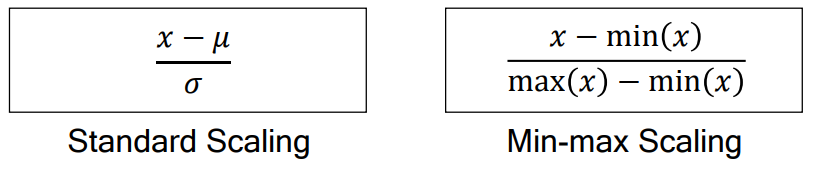

---
- Standard Scaling : 특징값에서 전체의 평균값을 빼고 표준편차로 나눈 값
    - 이론적으로는 범위가 -∞ ~ +∞ 이다.
    - 하지만 실질적으로는 -3 ~ +3 가 일반적이다.
    
    
- Min-max Scaling : 특징값에서 최소값을 뺀 것을 (최대값-최소값)을 한 값으로 나눠주는 것
    - 항상 0 ~ 1 사이의 범위의 값을 가진다.

- Standard Scaling을 한다고 하더라도 변수간 스케일이 완벽하게 맞춰지지는 않기 때문에 대부분의 경우는 MinMax Scaling을 사용하는 것이 더 바람직하다. (특수한 경우 제외)

## 관련 문법 : sklearn.preprocessing.MinMaxScaler & StandardScaler
---

- MinMaxScaler & StandardScaler를 수행하는 인스턴스를 생성하는 함수


**주요 메서드**

---
- fit : 변수별 통계량을 계산하여 저장 (min max는 최대값 & 최소값, standard는 평균 & 표준편차)
- transform : 변수별 통계량을 바탕으로 스케일링 적용
- inverse_transform : 스케일랑된 값을 다시 원래 값으로 변환 
    - 보통 특징을 scaling하면 label도 scaling하기 때문에, 예측한 후에 다시 원래 값으로 돌릴때 많이 사용

In [1]:
import os
import pandas as pd

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

a=%pwd # 현재 경로 a에 할당
os.chdir(a) # 파일 로드 경로 설정

In [2]:
# 야구 선수 연봉 예측용 실습 파일
df = pd.read_csv("baseball.csv")
df.head()

,Batting_average,On-base_percentage,Runs,Hits,Doubles,Triples,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agency_eligibility,Free_agent,Arbitration_eligibility,Arbitration,Salary
0,0.271,0.328,74,161,22,6,12,58,49,133,23,17,1,1,0,0,109
1,0.264,0.318,24,48,7,0,1,22,15,18,0,7,0,0,0,0,160
2,0.251,0.338,101,141,35,3,32,105,71,104,34,6,0,0,1,0,2700
3,0.224,0.274,28,94,21,1,1,44,27,54,2,7,1,1,0,0,550
4,0.206,0.262,14,51,18,1,1,28,17,26,0,3,1,1,0,0,300


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Batting_average          337 non-null    float64
 1   On-base_percentage       337 non-null    float64
 2   Runs                     337 non-null    int64  
 3   Hits                     337 non-null    int64  
 4   Doubles                  337 non-null    int64  
 5   Triples                  337 non-null    int64  
 6   HomeRuns                 337 non-null    int64  
 7   Runs_batted_in           337 non-null    int64  
 8   Walks                    337 non-null    int64  
 9   Strike-Outs              337 non-null    int64  
 10  Stolen_bases             337 non-null    int64  
 11  Errors                   337 non-null    int64  
 12  Free_agency_eligibility  337 non-null    int64  
 13  Free_agent               337 non-null    int64  
 14  Arbitration_eligibility  3

In [4]:
df.describe()

,Batting_average,On-base_percentage,Runs,Hits,Doubles,Triples,HomeRuns,Runs_batted_in,Walks,Strike-Outs,Stolen_bases,Errors,Free_agency_eligibility,Free_agent,Arbitration_eligibility,Arbitration,Salary
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,0.257825,0.323973,46.697329,92.833828,16.673591,2.338279,9.097923,44.020772,35.017804,56.706231,8.246291,6.771513,0.397626,0.115727,0.192878,0.029674,1248.528190
std,0.039546,0.047132,29.020166,51.896322,10.452001,2.543336,9.289934,29.559406,24.842474,33.828784,11.664782,5.927490,0.490135,0.320373,0.395145,0.169938,1240.013309
min,0.063000,0.063000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,109.000000
25%,0.238000,0.297000,22.000000,51.000000,9.000000,0.000000,2.000000,21.000000,15.000000,31.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,230.000000
50%,0.260000,0.323000,41.000000,91.000000,15.000000,2.000000,6.000000,39.000000,30.000000,49.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,740.000000
75%,0.281000,0.354000,69.000000,136.000000,23.000000,3.000000,15.000000,66.000000,49.000000,78.000000,11.000000,9.000000,1.000000,0.000000,0.000000,0.000000,2150.000000
max,0.457000,0.486000,133.000000,216.000000,49.000000,15.000000,44.000000,133.000000,138.000000,175.000000,76.000000,31.000000,1.000000,1.000000,1.000000,1.000000,6100.000000


In [5]:
# 특징과 라벨 분리
X = df.drop('Salary', axis = 1)
Y = df['Salary']

In [6]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

각 특징들의 범위 (최대값 - 최소값) 확인

In [7]:
Train_X.max() - Train_X.min()

Batting_average              0.394
On-base_percentage           0.423
Runs                       133.000
Hits                       215.000
Doubles                     49.000
Triples                     15.000
HomeRuns                    44.000
Runs_batted_in             133.000
Walks                      138.000
Strike-Outs                173.000
Stolen_bases                56.000
Errors                      31.000
Free_agency_eligibility      1.000
Free_agent                   1.000
Arbitration_eligibility      1.000
Arbitration                  1.000
dtype: float64

- 어떤 특징은 0.3정도의 범주인데, 어떤값은 100단위가 넘어가는 범주를 갖고 있다.
    - 즉, 특징 간 스케일 차이가 크다는 것을 알 수 있다.
    - 이를 통해 스케일이 작은 특징은 모델에 영향을 거의 주지 못할 것이라 예상할 수 있다.

In [8]:
# 스케일링 전에 성능 확인
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_error as MAE

# 인스턴스화 & fitting
# default 거리함수는 euclidean
model = KNN().fit(Train_X, Train_Y)

# 예측
pred_Y = model.predict(Test_X)

#평가
score = MAE(Test_Y, pred_Y)
print(score)

665.5317647058824


# MinMax Scaling 수행
- KNN은 특정 분포를 가정하지 않는 모델 -> Minmax scaling이 적합

In [9]:
# 스케일링 수행
from sklearn.preprocessing import MinMaxScaler

# 스케일링 인스턴스 생성 & fitting
scaler = MinMaxScaler().fit(Train_X)

# 스케일러 transform
# 결과값은 ndarray형태이다. 
s_Train_X = scaler.transform(Train_X)
s_Test_X = scaler.transform(Test_X)

In [10]:
# 결과 확인 (Minmax Scaling은 0 ~ 1 사이의 값을 가진다.)
# 즉 최대값 -  최소값은 1-0 = 1 이 되어야 한다.
s_Train_X.max() - s_Train_X.min()

1.0

## 스케일링한 데이터로 모델 학습 및 평가

In [11]:
model = KNN().fit(s_Train_X, Train_Y)
pred_Y = model.predict(s_Test_X)

score = MAE(Test_Y, pred_Y)
print(score)

421.85176470588243


- 스케일링 이전의 KNN의 경우 특징의 범주값이 100이 넘어가는 특징들 (Runs, Hits, Doubles 등)과 범주 값이 아주 작은 Batting_average와 같은 변수들의 간극으로 인해, 범주 값이 작은 데이터 들의 특징이 무시되었을 가능성이 높다.

- 이를 Min Max Scaling을 통해 그 간격을 줄여 줌으로서 모든 변수의 특징이 반영될 수 있도록 조정되었기 때문에 성능이 증가한 것 이다.

# 스케일링으로 모델성능이 저하되는 경우
---
- 다만, 매번 스케일링을 적용할때마다 모델의 성능이 좋아지는 것은 아니다.
- 예를 들어 만약 범주값의 범위가 0.00~ 이었던 변수들이 label인 Salary와 아무런 관련이 없는 변수라면, 스케일링 적용전에 해당 특징들이 무시되었던 것이 더 좋은 모델 성능을 냈을 것이다.
- 하지만 스케일링을 진행함으로 label예측과는 상관없는 특징들이 추가됨으로 인해 모델 성능이 떨어지게 될 수도 있다는 것이다.

---
- 전처리과정에서 특정 기법을 적용한다고 무조건 모델의 성능이 나아지는 경우는 절대 없다.
- 따라서, 전처리 전후 과정을 보고 성능이 떨어졌을때 왜 성능이 떨어지는지 그 원인을 파악하는 것이 매우 중요하다.